# Unsupervised Learning: Clustering
This notebook performs KMeans clustering on the composite index dataset. We standardize the features, determine the optimal number of clusters via silhouette analysis, and visualize the cluster assignment using PCA.

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import adjusted_rand_score

## 1. Load Data
Read the composite index with normalized sub-indices.

In [52]:
df = pd.read_csv('C:/Users/Fernanda Costa/OneDrive - Universidade de Aveiro/Desktop/seminar_project/5_composite_index\composite_index.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Fernanda Costa\AppData\Local\Temp\ipykernel_13984\2040441760.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('C:/Users/Fernanda Costa/OneDrive - Universidade de Aveiro/Desktop/seminar_project/5_composite_index\composite_index.csv')


,Cidade,Categoria,Nome,Rating,Endereço,Tipos,Latitude,Longitude,Total_Reviews,id_unico,...,Longitude_Nova,Endereço_Limpo,shrinkage,Rating_Bayes,Nome_Local,Avg_Polarity,Rating_Bayes_norm,Popularity_norm,Sentiment_norm,IGATP
0,Arouca,restaurant,Tasquinha da Quinta,4.6,"R. 1º de Maio 3, 4540-121 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.929109,-8.245191,2154,d111a3c6,...,-8.365184,"R. 1º de Maio 3, 4540-121 Arouca, Portugal",0.993672,4.599043,Tasquinha da Quinta,0.424000,0.881808,0.024950,0.707143,0.537967
1,Arouca,restaurant,Tasquinho do Parque,4.5,"R. Dom Afonso Henriques 57 4540, Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.927645,-8.248854,203,066473c6,...,-8.248950,"R. Dom Afonso Henriques 57 4540, Arouca, Portugal",0.936705,4.496752,Tasquinho do Parque,0.457871,0.839524,0.002351,0.733064,0.524980
2,Arouca,restaurant,Varandinha,4.4,"Av. Reinaldo Noronha 39, 4540-181 Arouca, Port...","restaurant, food, point_of_interest, establish...",40.934069,-8.241372,721,dc4ee328,...,-8.244661,"Av. Reinaldo Noronha 39, 4540-181 Arouca, Port...",0.981330,4.400909,Varandinha,0.397270,0.799904,0.008352,0.686686,0.498314
3,Arouca,restaurant,Café Arouquense,4.3,"Av. 25 de Abril, 4540-102 Arouca, Portugal","cafe, restaurant, food, point_of_interest, est...",40.928469,-8.245599,901,47e0eea2,...,-8.248323,"Av. 25 de Abril, 4540-102 Arouca, Portugal",0.985004,4.302230,Café Arouquense,0.572370,0.759113,0.010437,0.820691,0.530080
4,Arouca,restaurant,Quinta D'Além da Ponte,4.5,"Lugar do, 4540-606 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.939060,-8.341836,423,61113e19,...,-8.395749,"Lugar do, 4540-606 Arouca, Portugal",0.968591,4.498388,Quinta D'Além da Ponte,0.650000,0.840200,0.004900,0.880102,0.575067


In [53]:
df.columns

Index(['Cidade', 'Categoria', 'Nome', 'Rating', 'Endereço', 'Tipos',
       'Latitude', 'Longitude', 'Total_Reviews', 'id_unico', 'Grupo_Tematico',
       'Locais_Semelhantes_Perto', 'Latitude_Nova', 'Longitude_Nova',
       'Endereço_Limpo', 'shrinkage', 'Rating_Bayes', 'Nome_Local',
       'Avg_Polarity', 'Rating_Bayes_norm', 'Popularity_norm',
       'Sentiment_norm', 'IGATP'],
      dtype='object')

## 2. Feature Selection and Scaling
We select the normalized sub-indices as features for clustering.

In [54]:
features = ['Rating_Bayes_norm', 'Popularity_norm', 'Sentiment_norm']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Silhouette Analysis (K-Means)
Compute the average silhouette score for k in range 2 to 10 to find the optimal k.

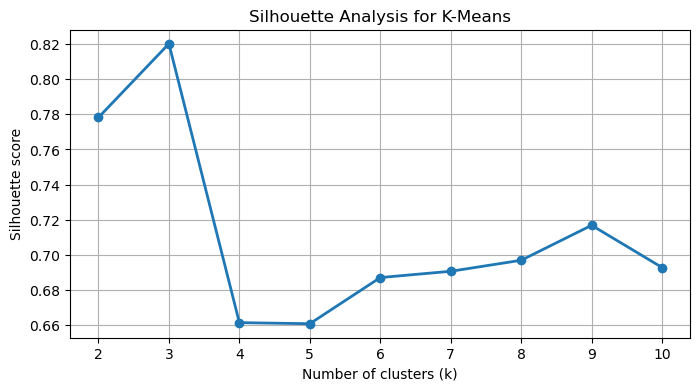

In [55]:
# Pick the three normalized sub-indices
X = df[['Rating_Bayes_norm', 'Popularity_norm', 'Sentiment_norm']]

# Impute any NaNs with the column means
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Silhouette analysis to choose k
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot the silhouette curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, 'o-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for K-Means')
plt.grid(True)
plt.show()

## 4. K-Means Clustering
Based on silhouette analysis, choose the optimal k and fit K-Means.

In [56]:
# Suppose k_optimal = 2
k_2 = 2
kmeans = KMeans(n_clusters=k_2, random_state=42)
df['cluster_k2'] = kmeans.fit_predict(X_scaled)
df['cluster_k2'] = df['cluster_k2'].astype(str)  # for plotting
df['cluster_k2'].value_counts()

cluster_k2
0    2428
1      92
Name: count, dtype: int64

In [57]:
# Suppose k_optimal = 3
k_3 = 3
kmeans = KMeans(n_clusters=k_3, random_state=42)
df['cluster_k3'] = kmeans.fit_predict(X_scaled)
df['cluster_k3'] = df['cluster_k3'].astype(str)  # for plotting
df['cluster_k3'].value_counts()

cluster_k3
0    2471
2      48
1       1
Name: count, dtype: int64

In [58]:
# Suppose k_optimal = 6
k_6 = 6
kmeans = KMeans(n_clusters=k_6, random_state=42)
df['cluster_k6'] = kmeans.fit_predict(X_scaled)
df['cluster_k6'] = df['cluster_k6'].astype(str)  # for plotting
df['cluster_k6'].value_counts()

cluster_k6
0    1983
4     246
3     145
5     118
2      27
1       1
Name: count, dtype: int64

In [59]:
# Suppose k_optimal = 7
k_7 = 7
kmeans = KMeans(n_clusters=k_7, random_state=42)
df['cluster_k7'] = kmeans.fit_predict(X_scaled)
df['cluster_k7'] = df['cluster_k7'].astype(str)  # for plotting
df['cluster_k7'].value_counts()

cluster_k7
0    1983
4     246
3     145
5     116
2      27
6       2
1       1
Name: count, dtype: int64

In [60]:
# Suppose k_optimal = 8
k_8 = 8
kmeans = KMeans(n_clusters=k_8, random_state=42)
df['cluster_k8'] = kmeans.fit_predict(X_scaled)
df['cluster_k8'] = df['cluster_k8'].astype(str)  # for plotting
df['cluster_k8'].value_counts()

cluster_k8
0    1947
6     243
3     144
5     140
2      31
4      12
7       2
1       1
Name: count, dtype: int64

In [61]:
# Suppose k_optimal = 9
k_9 = 9
kmeans = KMeans(n_clusters=k_9, random_state=42)
df['cluster_k9'] = kmeans.fit_predict(X_scaled)
df['cluster_k9'] = df['cluster_k9'].astype(str)  # for plotting
df['cluster_k9'].value_counts()

cluster_k9
0    1851
6     213
3     144
8     133
5     133
2      31
4      12
7       2
1       1
Name: count, dtype: int64

## 5. PCA Visualization (K-Means)
Project the scaled data into 2D via PCA and plot clusters.

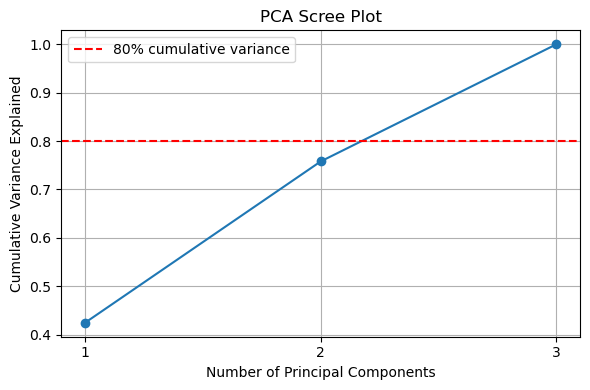

PC1: variance = 0.425, cumulative = 0.425
PC2: variance = 0.333, cumulative = 0.758
PC3: variance = 0.242, cumulative = 1.000


In [62]:
# Assume X_scaled is your normalized feature matrix
pca_full = PCA().fit(X_scaled)

# 1) Variance explained by each component
evr = pca_full.explained_variance_ratio_
cum_evr = evr.cumsum()

# 2) Scree plot (elbow) for cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(evr) + 1), cum_evr, marker='o', linestyle='-')
plt.axhline(0.80, color='red', linestyle='--', label='80% cumulative variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA Scree Plot')
plt.xticks(np.arange(1, len(evr) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Print out the individual and cumulative variances
for i, (var, cumvar) in enumerate(zip(evr, cum_evr), start=1):
    print(f"PC{i}: variance = {var:.3f}, cumulative = {cumvar:.3f}")



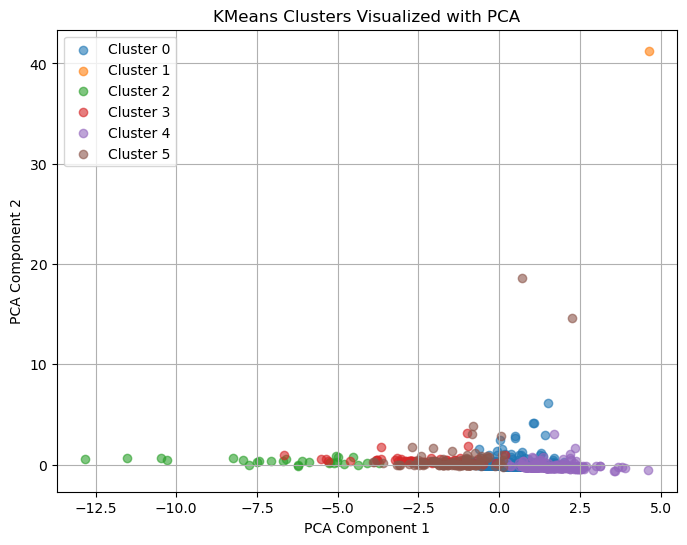

In [73]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
for cluster in sorted(df['cluster_k6'].unique()):
    mask = df['cluster_k6'] == cluster
    plt.scatter(coords[mask, 0], coords[mask, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Get the component matrix
components = pca.components_  # shape (n_components, n_features)

# Turn it into a nicer DataFrame with feature names
feature_names = ['Rating_Bayes_norm', 'Popularity_norm', 'Sentiment_norm']
loadings = pd.DataFrame(components.T, 
                        index=feature_names, 
                        columns=[f'PC{i+1}' for i in range(components.shape[0])])

# Scale by the square-root of explained variance (i.e. "standardized loadings")
sqrt_var = np.sqrt(pca.explained_variance_)
loadings = loadings.multiply(sqrt_var, axis=1)

print("PCA loadings:")
display(loadings.round(3))


PCA loadings:


,PC1,PC2
Rating_Bayes_norm,0.798,0.003
Popularity_norm,0.081,0.995
Sentiment_norm,0.794,-0.105


## 6. Cluster Summary (K-Means)
Display the number of locations in each cluster.

In [75]:
summary = df['cluster_k6'].value_counts().reset_index()
summary.columns = ['cluster_k6', 'count']
print(summary)

  cluster_k6  count
0          0   1983
1          4    246
2          3    145
3          5    118
4          2     27
5          1      1


## 7. Silhouette Analysis (K-Medians)
Compute the average silhouette score for k in range 2 to 10 to find the optimal k.

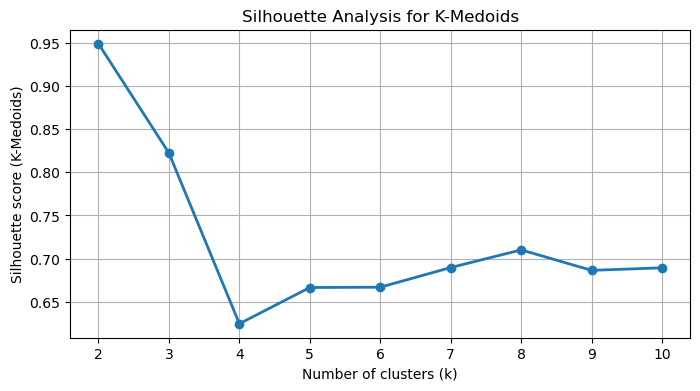

In [66]:
# Prepare the data exactly as before
X = df[['Rating_Bayes_norm', 'Popularity_norm', 'Sentiment_norm']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Silhouette analysis for K-Medoids
sil_scores_kmed = []
K_range = range(2, 11)

for k in K_range:
    # need k initial medoid indices, just pick first k points
    initial_medoids = list(range(k))
    pam = kmedoids(X_scaled.tolist(), initial_medoids, data_type='points')
    pam.process()
    clusters = pam.get_clusters()

    # convert clusters→flat label array
    labels = np.empty(len(X_scaled), dtype=int)
    for cid, members in enumerate(clusters):
        labels[members] = cid

    # compute silhouette
    score = silhouette_score(X_scaled, labels)
    sil_scores_kmed.append(score)

# Plot it
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores_kmed, 'o-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score (K-Medoids)')
plt.title('Silhouette Analysis for K-Medoids')
plt.grid(True)
plt.show()

## 8. K-Medoids Clustering

Use the optimal k = 6 and fit K-Medoids.

In [79]:
# Algorithmic Robustness: K-Medoids + ARI
k = 6
initial_medoids = list(range(k))  # pontos iniciais arbitrários

pam = kmedoids(X_scaled.tolist(), initial_medoids, data_type='points')
pam.process()
clusters = pam.get_clusters()

pam_labels = np.empty(len(X_scaled), dtype=int)
for cluster_id, members in enumerate(clusters):
    pam_labels[members] = cluster_id

df['cluster_k6_pam'] = pam_labels.astype(str)
ari = adjusted_rand_score(df['cluster_k6'], df['cluster_k6_pam'])
print(f"ARI (KMeans vs KMedoids) for k={k}: {ari:.3f}")

ARI (KMeans vs KMedoids) for k=6: 0.861


In [80]:
score_kmeans = silhouette_score(X_scaled, df['cluster_k6'].astype(int))
score_pam    = silhouette_score(X_scaled, df['cluster_k6_pam'].astype(int))
print(f"Silhouette KMeans: {score_kmeans:.3f}")
print(f"Silhouette KMedoids: {score_pam:.3f}")

Silhouette KMeans: 0.687
Silhouette KMedoids: 0.667


## 9. PCA Visualization (K-Medoids)
Project the scaled data into 2D via PCA and plot clusters.

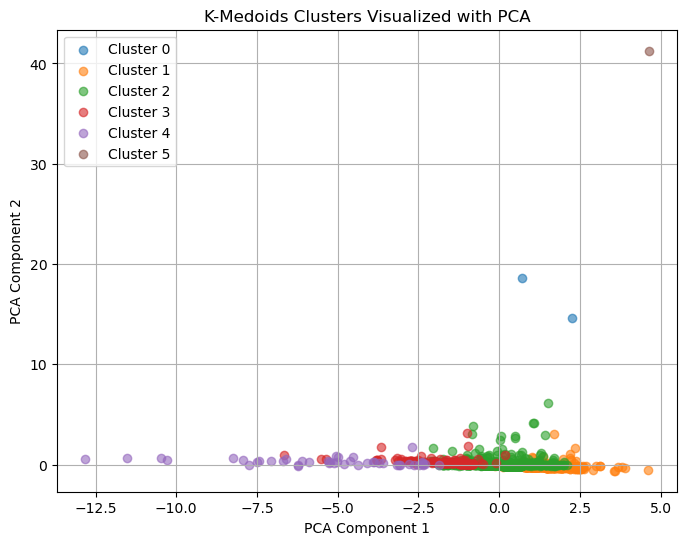

In [85]:
plt.figure(figsize=(8, 6))
for cluster in sorted(df['cluster_k6_pam'].unique()):
    mask = df['cluster_k6_pam'] == cluster
    plt.scatter(coords[mask, 0], coords[mask, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Medoids Clusters Visualized with PCA')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Get the component matrix
components = pca.components_  # shape (n_components, n_features)

# Turn it into a nicer DataFrame with feature names
feature_names = ['Rating_Bayes_norm', 'Popularity_norm', 'Sentiment_norm']
loadings = pd.DataFrame(components.T, 
                        index=feature_names, 
                        columns=[f'PC{i+1}' for i in range(components.shape[0])])

# Scale by the square-root of explained variance (i.e. "standardized loadings")
sqrt_var = np.sqrt(pca.explained_variance_)
loadings = loadings.multiply(sqrt_var, axis=1)

print("PCA loadings:")
display(loadings.round(3))

PCA loadings:


,PC1,PC2
Rating_Bayes_norm,0.798,0.003
Popularity_norm,0.081,0.995
Sentiment_norm,0.794,-0.105


## 10. Cluster Summary (K-Medoids)
Display the number of locations in each cluster and save the results.

In [82]:
summary = df['cluster_k6_pam'].value_counts().reset_index()
summary.columns = ['cluster_k6_pam', 'count']
print(summary)

df.to_csv('composite_index_with_clusters.csv', index=False)
print('Saved composite_index_with_clusters.csv')

  cluster_k6_pam  count
0              2   2070
1              1    254
2              3    148
3              4     45
4              0      2
5              5      1
Saved composite_index_with_clusters.csv


In [83]:
df.head()

,Cidade,Categoria,Nome,Rating,Endereço,Tipos,Latitude,Longitude,Total_Reviews,id_unico,...,Sentiment_norm,IGATP,cluster_k2,cluster_k3,cluster_k6,cluster_k7,cluster_k8,cluster_k9,cluster_k7_pam,cluster_k6_pam
0,Arouca,restaurant,Tasquinha da Quinta,4.6,"R. 1º de Maio 3, 4540-121 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.929109,-8.245191,2154,d111a3c6,...,0.707143,0.537967,0,0,0,0,0,8,2,2
1,Arouca,restaurant,Tasquinho do Parque,4.5,"R. Dom Afonso Henriques 57 4540, Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.927645,-8.248854,203,066473c6,...,0.733064,0.524980,0,0,4,4,6,6,1,1
2,Arouca,restaurant,Varandinha,4.4,"Av. Reinaldo Noronha 39, 4540-181 Arouca, Port...","restaurant, food, point_of_interest, establish...",40.934069,-8.241372,721,dc4ee328,...,0.686686,0.498314,0,0,0,0,0,0,2,2
3,Arouca,restaurant,Café Arouquense,4.3,"Av. 25 de Abril, 4540-102 Arouca, Portugal","cafe, restaurant, food, point_of_interest, est...",40.928469,-8.245599,901,47e0eea2,...,0.820691,0.530080,0,0,4,4,6,6,1,1
4,Arouca,restaurant,Quinta D'Além da Ponte,4.5,"Lugar do, 4540-606 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.939060,-8.341836,423,61113e19,...,0.880102,0.575067,0,0,4,4,6,6,1,1


In [84]:
df.columns

Index(['Cidade', 'Categoria', 'Nome', 'Rating', 'Endereço', 'Tipos',
       'Latitude', 'Longitude', 'Total_Reviews', 'id_unico', 'Grupo_Tematico',
       'Locais_Semelhantes_Perto', 'Latitude_Nova', 'Longitude_Nova',
       'Endereço_Limpo', 'shrinkage', 'Rating_Bayes', 'Nome_Local',
       'Avg_Polarity', 'Rating_Bayes_norm', 'Popularity_norm',
       'Sentiment_norm', 'IGATP', 'cluster_k2', 'cluster_k3', 'cluster_k6',
       'cluster_k7', 'cluster_k8', 'cluster_k9', 'cluster_k7_pam',
       'cluster_k6_pam'],
      dtype='object')